<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
diff=np.float32(12.123452) - np.float32(12.123450)
valor_real = 0.000002
error=(abs(diff-valor_real)/valor_real)*100
print(f"{error}%")
#(12.123452/valor_real)*1/(2**31)

1.9073486e-06
4.632568359374996%


In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [18]:
import math

def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n - 1)

def exp_minus_x(x, N, tolerancia):
  suma = 0.0
  termino = 1.0
  for n in range(N + 1):
    suma += termino
    termino *= -x / (n + 1)
    if abs(termino) < tolerancia * abs(suma):
      break
  return suma

def main():
  x = 0.5
  N = 10
  tolerancia = 1e-7

  # Calcular e^(-x) con la serie de Maclaurin
  suma_serie = exp_minus_x(x, N, tolerancia)

  # Comparar con la función exp(-x) incorporada
  exp_incorporada = math.exp(-x)

  # Mostrar resultados
  print(f"x = {x}")
  print(f"N = {N}")
  print(f"Serie de Maclaurin: {suma_serie}")
  print(f"Función exp(-x) incorporada: {exp_incorporada}")
  print(f"Error: {abs(suma_serie - exp_incorporada)}")

  # Examinar términos para x ≈ 10
  if x == 10.0:
    for n in range(N + 1):
      print(f"n = {n}, término = {(-x)**n / factorial(n)}")

  # Probar la precisión con exp(-x) = 1 / exp(x)
  if x >= 10.0:
    exp_inversa = 1.0 / exp_minus_x(x, N, tolerancia)
    print(f"e^(-x) usando 1 / exp(x): {exp_inversa}")

main()


x = 0.5
N = 10
Serie de Maclaurin: 0.6065306648375496
Función exp(-x) incorporada: 0.6065306597126334
Error: 5.124916158116832e-09


## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




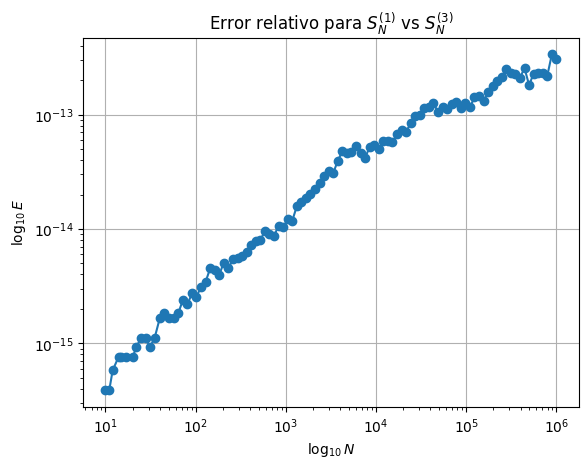

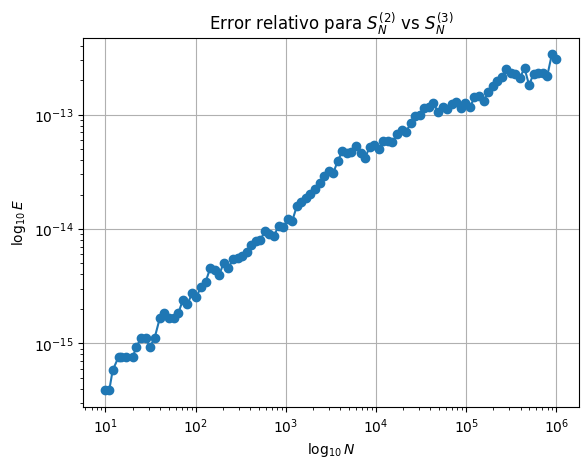

array([0.28360955, 0.28558583, 0.2872525 , 0.28990853, 0.2909838 ,
       0.2927711 , 0.29480637, 0.29586513, 0.297145  , 0.29815782,
       0.29897929, 0.29986015, 0.30071808, 0.3013885 , 0.30192683,
       0.3025239 , 0.30299187, 0.30341643, 0.30379474, 0.30412804,
       0.30441974, 0.30467418, 0.30492604, 0.30513756, 0.30531672,
       0.30549228, 0.30563775, 0.30577407, 0.30589036, 0.30599592,
       0.30609004, 0.30617301, 0.30624859, 0.3063149 , 0.30637366,
       0.30642602, 0.30647274, 0.30651487, 0.30655189, 0.30658479,
       0.30661421, 0.30664037, 0.30666368, 0.30668444, 0.30670301,
       0.3067194 , 0.30673404, 0.3067471 , 0.30675872, 0.30676903,
       0.30677823, 0.30678641, 0.30679371, 0.3068002 , 0.30680597,
       0.30681112, 0.3068157 , 0.30681977, 0.3068234 , 0.30682663,
       0.3068295 , 0.30683207, 0.30683434, 0.30683637, 0.30683818,
       0.30683978, 0.30684122, 0.30684249, 0.30684362, 0.30684463,
       0.30684553, 0.30684633, 0.30684704, 0.30684768, 0.30684

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def sum_S1(N):
    result = np.zeros_like(N, dtype=float)
    for i, n in enumerate(N):
        for j in range(1, 2*n + 1):
            result[i] += (-1)**j * j / (j + 1)
    return result

def sum_S2(N):
    result = np.zeros_like(N, dtype=float)
    for i, n in enumerate(N):
        for j in range(1, n + 1):
            result[i] -= (2*j - 1) / (2*j)
            result[i] += 2*j / (2*j + 1)
    return result

def sum_S3(N):
    result = np.zeros_like(N, dtype=float)
    for i, n in enumerate(N):
        for j in range(1, n + 1):
            result[i] += 1 / (2*j * (2*j + 1))
    return result

def relative_error(approx, exact):
    return np.abs((approx - exact) / exact)

def plot_error(N_values, error_values, title):
    plt.figure()
    plt.loglog(N_values, error_values, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('$\log_{10} N$')
    plt.ylabel('$\log_{10} E$')
    plt.grid(True)
    plt.show()

N_values = np.logspace(1, 6, num=100, dtype=int)
error_S1 = relative_error(sum_S1(N_values), sum_S3(N_values))
error_S2 = relative_error(sum_S2(N_values), sum_S3(N_values))

plot_error(N_values, error_S1, 'Error relativo para $S_N^{(1)}$ vs $S_N^{(3)}$')
plot_error(N_values, error_S2, 'Error relativo para $S_N^{(2)}$ vs $S_N^{(3)}$')
sum_S1(N_values)
sum_S2(N_values)
sum_S3(N_values)
